<a href="https://colab.research.google.com/github/ajrianop/Data-Science-with-Python/blob/main/2_PreprocessingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-processing data**

Remark: We are going to take a dataset from IBM Skills Building called auto.csv

## **Import Libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb

## **How we lead Pre-processing data**

We are going to describe an order to do data analysis:
* data cleaning and data wrangling <br>
* handle with the information <br>
* see the data fotmatting <br>
* normalizing the data <br>
* data binning <br>
* convert categorical values to numbers

We are going to download the information given in auto.csv

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Note that the information in the .csv does not have a header and only has the information, in this case, in order that the dataframe does not choose the informationn in the first arrow, we put in the arguments of the method `header=None`. In this case all the headers in each columns will be relate to an order number.

In [ ]:
auto=pd.read_csv("/content/gdrive/MyDrive/Programming Topics/Data Science/data/auto.csv", header=None)
auto.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


If we want to define with a name each column, we need to write each name of the column in a list and then put as an argument in the method `names=headers`.

According to the previous one, we have that


1.   `header` is related to a list of numbers
2.   `names` is related to the list of names (string)



In [ ]:
#We named each column according to the following
headers= ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
#To describe the name of each column we need to put names= headers
auto=pd.read_csv("/content/gdrive/MyDrive/Programming Topics/Data Science/data/auto.csv", names=headers)

In [ ]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## **Data with missing values**

We could deal with missing values in differents forms, we need to take care how to proceed, because according to the information we can choose a better option, which it is not always the same.

We can find the missing values as a blanl cell, N/A,  NaN, None between different other. We can consider the following process:


1.   Drop the missing values:


*   We simply can drop the variable  where the value is lost.
*   Or we can drop the data entry.


2.   Replace the missing values:
 

*   We could use the average values and replace the missing values.
*   Also we can consider the value with the greatest frequency.
*   Or replace based in other descriptions.

3.   Leave the missing data as there.

We have to take into account, if we want to know if certain data is useful or not, we can study this according to the missing values. Because if we don't have the enough data to study due to the lackness of information, we could conclude that this data is not good enough to our analysis.




Methods wich are useful to work with:



1.   Drop values
*   `dataframe.dropna()`: this drop the NaN data.
*   `dataframe.dropna(subset=['price'], axis=0)` does not change the dataframe
*   `dataframe.dropna(subset=['price'], axis=0, inplace= True)` change the dataframe, and drop the missing values in row where we have NaN in the column price.



2.   Replace values


*   `dataframe.replace(missing_value, new_value)`
*   




In [ ]:
'''
Function to described all the unique values of each column:
'''
def unique_info_col(df):
  columns=df.columns
  for col_name in columns:
    info=df[col_name].unique()
    print(f'Name of the column:    {col_name}\nType of column:    {df[col_name].dtype}')
    print(f'{info}\n')

unique_info_col(auto)

Name of the column:    symboling
Type of column:    int64
[ 3  1  2  0 -1 -2]

Name of the column:    normalized-losses
Type of column:    object
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

Name of the column:    make
Type of column:    object
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

Name of the column:    fuel-type
Type of column:    object
['gas' 'diesel']

Name of the column:    aspiration
Type of column:    object
['std' 'turbo']

Name of the column:    num-of-doors
Type of column:    object
['two' 'four' '?']

Name of the column:    body-style
Type of 

Note that the data in the dataframe in some columns has as value the symbol `?`, which means that there are not information about this car. So, if we want to study this problem, the better idea is to change the `?` by `NaN` if the type of value is a number, but if the type of value is a string or other `?` will be change by ``None`

In [ ]:
'''
We replace all the values ? by NaN using numpy library
'''
auto1=auto.copy()
auto1.replace('?', np.nan, inplace=True)

In [ ]:
auto1.head()  

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
'''
Function which replace all de values NaN by None if the information is different
than a Number
'''
'''
def nullValues(df):
  new_df=df.copy()
  for col_name in df.columns:
    if new_df[col_name].dtype not in [type(3), type(1.5)]:
      new_df[col_name].fillna('None', inplace = True)
  return new_df

nullValues(auto1)
'''

"\ndef nullValues(df):\n  new_df=df.copy()\n  for col_name in df.columns:\n    if new_df[col_name].dtype not in [type(3), type(1.5)]:\n      new_df[col_name].fillna('None', inplace = True)\n  return new_df\n\nnullValues(auto1)\n"

Now we are going to see the missing data according to the method .isnull(), in this case the information in each entry will be `True` or `False`, according to the information.


*   If the entry is `NaN` will be return True.
*   If the entry is some values will be return False.



In [ ]:
isNullAuto=auto1.isnull()
isNullAuto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now we want to count the amount of data that dataframe has by column, so we can define a function which allows us to describe the information.

In [ ]:
#pd.DataFrame(isNullAuto['price'].value_counts()).loc[1]['price']
pd.DataFrame(isNullAuto['make'].value_counts())

,make
False,205


In [ ]:
'''
Function which count the null values (True) and not null values (False) in the dataframe.
'''
def countMissingValues(dfNullInfo):
  for column in dfNullInfo.columns:
      print(f'-----{column}-----')
      try:
        nullInfo=pd.DataFrame(dfNullInfo[column].value_counts()).loc[1][column]
      except:
        print('There are no null values\n')
        continue
      print (f'{nullInfo}')
      print("")

countMissingValues(isNullAuto)

-----symboling-----
There are no null values

-----normalized-losses-----
41

-----make-----
There are no null values

-----fuel-type-----
There are no null values

-----aspiration-----
There are no null values

-----num-of-doors-----
2

-----body-style-----
There are no null values

-----drive-wheels-----
There are no null values

-----engine-location-----
There are no null values

-----wheel-base-----
There are no null values

-----length-----
There are no null values

-----width-----
There are no null values

-----height-----
There are no null values

-----curb-weight-----
There are no null values

-----engine-type-----
There are no null values

-----num-of-cylinders-----
There are no null values

-----engine-size-----
There are no null values

-----fuel-system-----
There are no null values

-----bore-----
4

-----stroke-----
4

-----compression-ratio-----
There are no null values

-----horsepower-----
2

-----peak-rpm-----
2

-----city-mpg-----
There are no null values

-----highwa

### **Analysis of null values**

According to the previous data, we can see that `normalized-losses, num-of-doors,bore, stroke, horsepower, peak-rpm, price` has null values so we need to threat with this kind of entries by means different forms.<br>

Let us see the columns and the amount of null values

In [ ]:
'''
Function which count the null values (True) in the dataframe.
'''
def countColMissingValues(dfNullInfo):
  for column in dfNullInfo.columns:
      try:
        nullInfo=pd.DataFrame(dfNullInfo[column].value_counts()).loc[1][column]
        print(f'-----{column}-----')
        print (f'The amount of null values is:    {nullInfo}')
        print(f'The percentage of null values id:    {round((nullInfo/dfNullInfo.shape[0])*100, 2)}%')
      except:
        continue
      print("")

countColMissingValues(isNullAuto)

-----normalized-losses-----
The amount of null values is:    41
The percentage of null values id:    20.0%

-----num-of-doors-----
The amount of null values is:    2
The percentage of null values id:    0.98%

-----bore-----
The amount of null values is:    4
The percentage of null values id:    1.95%

-----stroke-----
The amount of null values is:    4
The percentage of null values id:    1.95%

-----horsepower-----
The amount of null values is:    2
The percentage of null values id:    0.98%

-----peak-rpm-----
The amount of null values is:    2
The percentage of null values id:    0.98%

-----price-----
The amount of null values is:    4
The percentage of null values id:    1.95%



### **How to deal with null values**

In order to do a prediction of prices for cars according to its features, we have to thing about, how can we deal with null values?<br>
 

#### **Replace by mean**

We have to compute the mean of the columns `'normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm'`


In [ ]:
newdf=auto1.copy()
mean = round(auto1['normalized-losses'].astype('float').mean(),2)
newdf['normalized-losses'].replace(np.nan, mean, inplace=True)
mean = round(auto1['bore'].astype('float').mean(),2)
newdf['bore'].replace(np.nan, mean, inplace=True)
mean = round(auto1['stroke'].astype('float').mean(),2)
newdf['stroke'].replace(np.nan, mean, inplace=True)
mean = round(auto1['horsepower'].astype('float').mean(),2)
newdf['horsepower'].replace(np.nan, mean, inplace=True)
mean = round(auto1['peak-rpm'].astype('float').mean(),2)
newdf['peak-rpm'].replace(np.nan, mean, inplace=True)
withoutNullAuto=newdf
withoutNullAuto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
#mean=auto1['normalized-losses'].astype('float').mean(axis=0)
#withoutNullAuto=auto1.replace(np.nan, , axis=0)
'''
Function which replace the missing values with the mean of the column

def dfReplaceWithMean(dfToModify,listToReplaceMean):
  for column in listToReplaceMean:
    newdf=dfToModify.copy()
    mean = round(auto1[column].astype('float').mean(),2)
    print(f'The average of { column=="normalized-losses" } is   {mean}')
  return newdf

  #The function has an error when we run the code, the mean is not replace using for
'''
'''
List of columns to replace data with mean value
lst=['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']    
withoutNullAuto=dfReplaceWithMean(auto1,lst)
withoutNullAuto.head()
'''

"\nList of columns to replace data with mean value\nlst=['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm']    \nwithoutNullAuto=dfReplaceWithMean(auto1,lst)\nwithoutNullAuto.head()\n"

#### **Replace by frequency**

We have to compute the frequency of the columns `'num-of-doors'` an replace it. This is the best option, because the number of doors is an integer number.

In [ ]:
'''
We have to find the value which appears with more frequency 
'''
frequency=withoutNullAuto['num-of-doors'].value_counts().idxmax()
before=withoutNullAuto['num-of-doors'].value_counts()
print(f'value counts BEFORE:\n{before}\n')
frequency
#We replace the value with greatest frequency
withoutNullAuto[['price']].replace(np.nan,frequency, inplace=True)
after=withoutNullAuto['num-of-doors'].value_counts()
print(f'value counts AFTER:\n{after}\n')
withoutNullAuto.head()

value counts BEFORE:
four    114
two      89
Name: num-of-doors, dtype: int64

value counts AFTER:
four    114
two      89
Name: num-of-doors, dtype: int64



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### **Drop values**

We want to predict the prices of cars according to this dataset, so if the value of the price is not in the column `price`, the best idea is to drop the values associated to this column.

In [ ]:
withoutNullAuto=withoutNullAuto.dropna(subset=["price"], axis=0)
print(f'Note that size of dataframe \nAuto1 = {withoutNullAuto.shape[0]} \nwithoutNullAuto = {withoutNullAuto.shape[0]}')
withoutNullAuto.head()

Note that size of dataframe 
Auto1 = 201 
withoutNullAuto = 201


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


After drop some of the rows the index has some absent values, so it is necessary to reset the index

In [ ]:
withoutNullAuto.reset_index(drop=True, inplace=True)

## **Data formatting**

Due to the data is collected from different sources, we have to take take with the notation or formats, which in general describes the same but has a different writting form. 
1. So the idea is to work with the same format. Note that if we refer to LA, L.A., Los Angeles, we are reffering to Los Angeles. So we should change all the different notation to one of then. 
2. In some other cases we can have different units to describe some physics units, so we have to take care how we are working with this units. Also in some cases in order to work with strings, we can vanish every accent and leave the information or upper or lower, to standarized each word. (Data standarization)
3. We have to correct the data types, and work with the correct type.


### **Changing the type of data for columns**

In the case of the dataframe which was cleaned before, we have to see if the information given is in the correct format. So we are going to print again the formats:

In [ ]:
withoutNullAuto.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [ ]:
withoutNullAuto.sample(4)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
48,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095
89,1,122,nissan,gas,std,four,sedan,fwd,front,94.5,...,97,2bbl,3.15,3.29,9.4,69,5200,31,37,6849
118,1,154,plymouth,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692
104,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900


We can see that `'normalized-losses'` has integer numbers so we can change the type of formats

In [ ]:
withoutNullAuto[["bore", "stroke"]] = withoutNullAuto[["bore", "stroke"]].astype("float")
withoutNullAuto[["normalized-losses",'horsepower']] = withoutNullAuto[["normalized-losses",'horsepower']].astype("int")
withoutNullAuto[["price"]] = withoutNullAuto[["price"]].astype("float")
withoutNullAuto[["peak-rpm"]] = withoutNullAuto[["peak-rpm"]].astype("float")
lst_categories=['make',"fuel-type","aspiration",'num-of-doors', 'body-style', 'drive-wheels', 'engine-location','engine-type',
       'num-of-cylinders', 'fuel-system']
withoutNullAuto[lst_categories] = withoutNullAuto[lst_categories].astype("category")
withoutNullAuto.dtypes


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


symboling               int64
normalized-losses       int64
make                 category
fuel-type            category
aspiration           category
num-of-doors         category
body-style           category
drive-wheels         category
engine-location      category
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type          category
num-of-cylinders     category
engine-size             int64
fuel-system          category
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int64
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                 float64
dtype: object

In [ ]:
withoutNullAuto.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

### **Standarizing**

In this case we can consider the information given with some units, and change it according to the System of measurements. 

## **Data normalization**

In this case the different values are described with different ranges, which for futher analysis, it could lead us to some misunderstandings or problems due to the values could be high or low and the weight in some calculus could affect the final result.<br>

We can find some methods to normalize data
1. Simple feature scaling<br>
$x_{new}=\frac{x_{old}}{x_{max}}$<br>
$x_{new}$ : is the value normalized.<br>
$x_{old}$ : the value given in the data.<br>
$x_{max}$ : the maximun value in the data.<br>

2. Min-Max<br>
$x_{new}=\frac{x_{old}-x_{min}}{x_{max}-x_{min}}$<br>
$x_{new}$ : is the value normalized.<br>
$x_{old}$ : the value given in the data.<br>
$x_{max}$ : the maximun value in the data.<br>
$x_{min}$ : the minimum value in the data.<br>

3. Z-score<br>
$x_{new}=\frac{x_{old}-μ}{σ}$<br>
$x_{old}$ : the value given in the data.<br>
$\mu$ : averega of the data.<br>
$\sigma$ : standard deviation<br>

We are going to normalize the information in `["length","width","height"]` so

In [ ]:
'''
Function that normalize the numeric data
'''
def normalizeCol(df,lst):
  new_df=df.copy()
  for column in lst:
    new_df[column]=new_df[column]/new_df[column].max()
  return new_df

'''
According to the following list we are going to normalize this data
'''
lst=["length","width","height"]
norWithoutNullAuto=normalizeCol(withoutNullAuto,lst)
print('The columns normalized in the dataframe')
norWithoutNullAuto[lst].head()

The columns normalized in the dataframe


,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


## **Binning in Python**



  Binning is when we group values into bins.
  In fact this process is useful in order to consider the exact range where our data is distributed and also allows us to described the information by groups. So we can convert numerical variables into categorical, this is similar to classify the information.

According to the dataframe after clear the missing values, standarize and normalize we can divide our information according to certain classification, as follow:

Text(0.5, 1.0, 'horsepower bins')

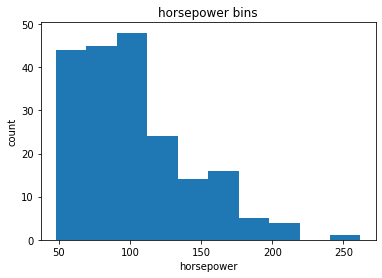

In [ ]:
'''
This code plot the distribution of norWithoutNullAuto in the entry 'horsepower'
'''
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(norWithoutNullAuto["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

We would like 3 bins of equal size bandwidth so we use numpy's linspace(start_value, end_value, numbers_generated function.

Since we want to include the minimum value of horsepower, we want to set start_value = min(df["horsepower"]).

Since we want to include the maximum value of horsepower, we want to set end_value = max(df["horsepower"]).

Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.

We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.

In [ ]:
bins = np.linspace(min(norWithoutNullAuto["horsepower"]), max(norWithoutNullAuto["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [ ]:
group_names = ['Low', 'Medium', 'High']

In [ ]:
norWithoutNullAuto['horsepower-binned'] = pd.cut(norWithoutNullAuto['horsepower'], bins, labels=group_names, include_lowest=True )
norWithoutNullAuto[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [ ]:
norWithoutNullAuto["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

We do a distribution of the data classified by `['Low', 'Medium', 'High']`, we have to take in mind that we have different forms to plot th information:


1.   Bar plot.
2.   Histogram.



Text(0.5, 1.0, 'horsepower bins')

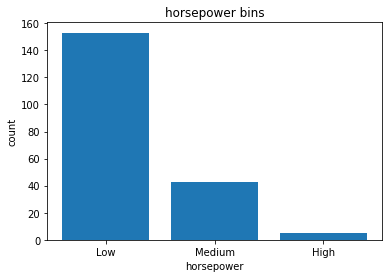

In [ ]:
#Bar plot
pyplot.bar(group_names, norWithoutNullAuto["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

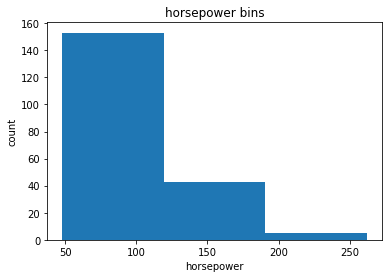

In [ ]:
#Histogram
plt.pyplot.hist(norWithoutNullAuto["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

## **Categorical variables into quantitative**

When we have categorical variables we can use the one hot encoding method to convert the categorical information given in quantitative, so it will be created new columns with the categoricals words, and fill it up with 0 or 1 according if the rows has 1 or not has 0 the information in these place.

To create this columns in pandas we can use the method:
`pd.get_dummies(df['name_of_column'])`
this method use the categorical values an create new columns according to the unique values in that first column. 

### **Indicator variable or Dummie variable**

The indicator variable is a numerical variable which allows us label categories. This indicator variables are very usefuls in order to do regression analysis.

In [ ]:
norWithoutNullAuto.head()
norWithoutNullAuto['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

We have that `'drive-wheels'` is a categorical variable, so we can apply the method, pd.get_dummies()

In [ ]:
dummy_variable_drive_wheels = pd.get_dummies(norWithoutNullAuto['drive-wheels'])
dummy_variable_drive_wheels.head()

,4wd,fwd,rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0


In order to the undestanding of the information is a good idea to change the name of the dummies variables, so we are going to describe the columns as `['drive_wheels_4wd' , 'drive_wheels_fwd' ,	'drive_wheels_rwd']` respectively. 

In [ ]:
new_names_drive_wheels={'4wd' : 'drive_wheels_4wd' , 'fwd' : 'drive_wheels_fwd' , 'rwd' : 'drive_wheels_rwd'}
dummy_variable_drive_wheels.rename(columns=new_names_drive_wheels, inplace=True)
dummy_variable_drive_wheels

,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,0,0,1
1,0,0,1
2,0,0,1
3,0,1,0
4,1,0,0
...,...,...,...
196,0,0,1
197,0,0,1
198,0,0,1
199,0,0,1


This method only described the dummies variables for the column `''drive-wheels'` so we have to concatenate both tables.

In [ ]:
norWithoutNullAuto = pd.concat([norWithoutNullAuto,dummy_variable_drive_wheels], axis=1)
norWithoutNullAuto

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,drive_wheels_4wd,drive_wheels_fwd,drive_wheels_rwd
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,13495.0,Low,0,0,1
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,9.0,111,5000.0,21,27,16500.0,Low,0,0,1
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,9.0,154,5000.0,19,26,16500.0,Medium,0,0,1
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,10.0,102,5500.0,24,30,13950.0,Low,0,1,0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,8.0,115,5500.0,18,22,17450.0,Low,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,9.5,114,5400.0,23,28,16845.0,Low,0,0,1
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,8.7,160,5300.0,19,25,19045.0,Medium,0,0,1
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,8.8,134,5500.0,18,23,21485.0,Medium,0,0,1
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,23.0,106,4800.0,26,27,22470.0,Low,0,0,1


## **Saving the dataframe in csv file**

In [ ]:
norWithoutNullAuto.to_csv('clean_auto.csv')